# **Librerias y Módulos🐼📊🗺** *texto en cursiva*

In [21]:
!pip install cartopy
!pip install pycountry
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# **Renderizar el DataFrame con Pandas🐼**

In [22]:

df = pd.read_csv('world_population.csv')
num_filas = len(df)

num_columnas = len(df.columns)
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

df

Número de filas: 234
Número de columnas: 17


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.06,1.03,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.87,1.00,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.85,1.02,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.48,0.98,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.56,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.49,1.00,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.17,1.02,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.82,1.02,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.60,1.03,0.25


In [26]:
import pandas as pd
import pycountry
def get_alpha_3(location):
  try:
    return pycountry.countries.get(name=location).alpha_3
  except:
    return None
df['Code']=df['Country/Territory'].apply(lambda x: get_alpha_3(x))
print(df.head(6))

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   
5    42  AGO            Angola            Luanda    Africa         35588987   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   
5       

In [24]:
import plotly.express as px
figura=px.choropleth(df,locations='Code',
                     color='Area (km²)',hover_name='Country/Territory',
                     color_continuous_scale=px.colors.sequential.Plasma)
figura.show()

In [25]:
import plotly.express as px
figura=px.choropleth(df,locations='Code',
                     color='Density (per km²)',hover_name='Country/Territory',
                     color_continuous_scale=px.colors.sequential.Plasma)
figura.show()

# **Estadística Descriptiva📊**

In [3]:
estadisticas_descriptivas = df.describe() #generar estadísticas
estadisticas_descriptivas.rename(index={ #traducir a español
    'count': 'conteo',
    'mean': 'media',
    'std': 'desviación estándar',
    'min': 'mínimo',
    '25%': 'percentil 25',
    '50%': 'percentil 50 (mediana)',
    '75%': 'percentil 75',
    'max': 'máximo',
}, inplace=True)
# Eliminar notación científica con ceros
pd.options.display.float_format = '{:.2f}'.format
estadisticas_descriptivas

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
conteo,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00,234.00
media,117.50,34074414.71,33501070.95,31729956.24,29845235.03,26269468.82,22710220.79,18984616.97,15786908.81,581449.38,452.13,1.01,0.43
desviación estándar,67.69,136766424.80,135589876.92,130404992.75,124218487.63,111698206.72,97832173.35,81785186.08,67795091.64,1761840.86,2066.12,0.01,1.71
mínimo,1.00,510.00,520.00,564.00,596.00,651.00,700.00,733.00,752.00,1.00,0.03,0.91,0.00
percentil 25,59.25,419738.50,415284.50,404676.00,393149.00,327242.00,264115.75,229614.25,155997.00,2650.00,38.42,1.00,0.01
percentil 50 (mediana),117.50,5559944.50,5493074.50,5307400.00,4942770.50,4292907.00,3825409.50,3141145.50,2604830.00,81199.50,95.35,1.01,0.07
percentil 75,175.75,22476504.75,21447979.50,19730853.75,19159567.50,15762301.00,11869231.00,9826053.75,8817329.00,430425.75,238.93,1.02,0.28
máximo,234.00,1425887337.00,1424929781.00,1393715448.00,1348191368.00,1264099069.00,1153704252.00,982372466.00,822534450.00,17098242.00,23172.27,1.07,17.88


# **DataFrame🐼 de Europa 🗺**

In [30]:
df_europa = df.loc[df['Continent'] == 'Europe']
#df_europa.describe()
#df_europa


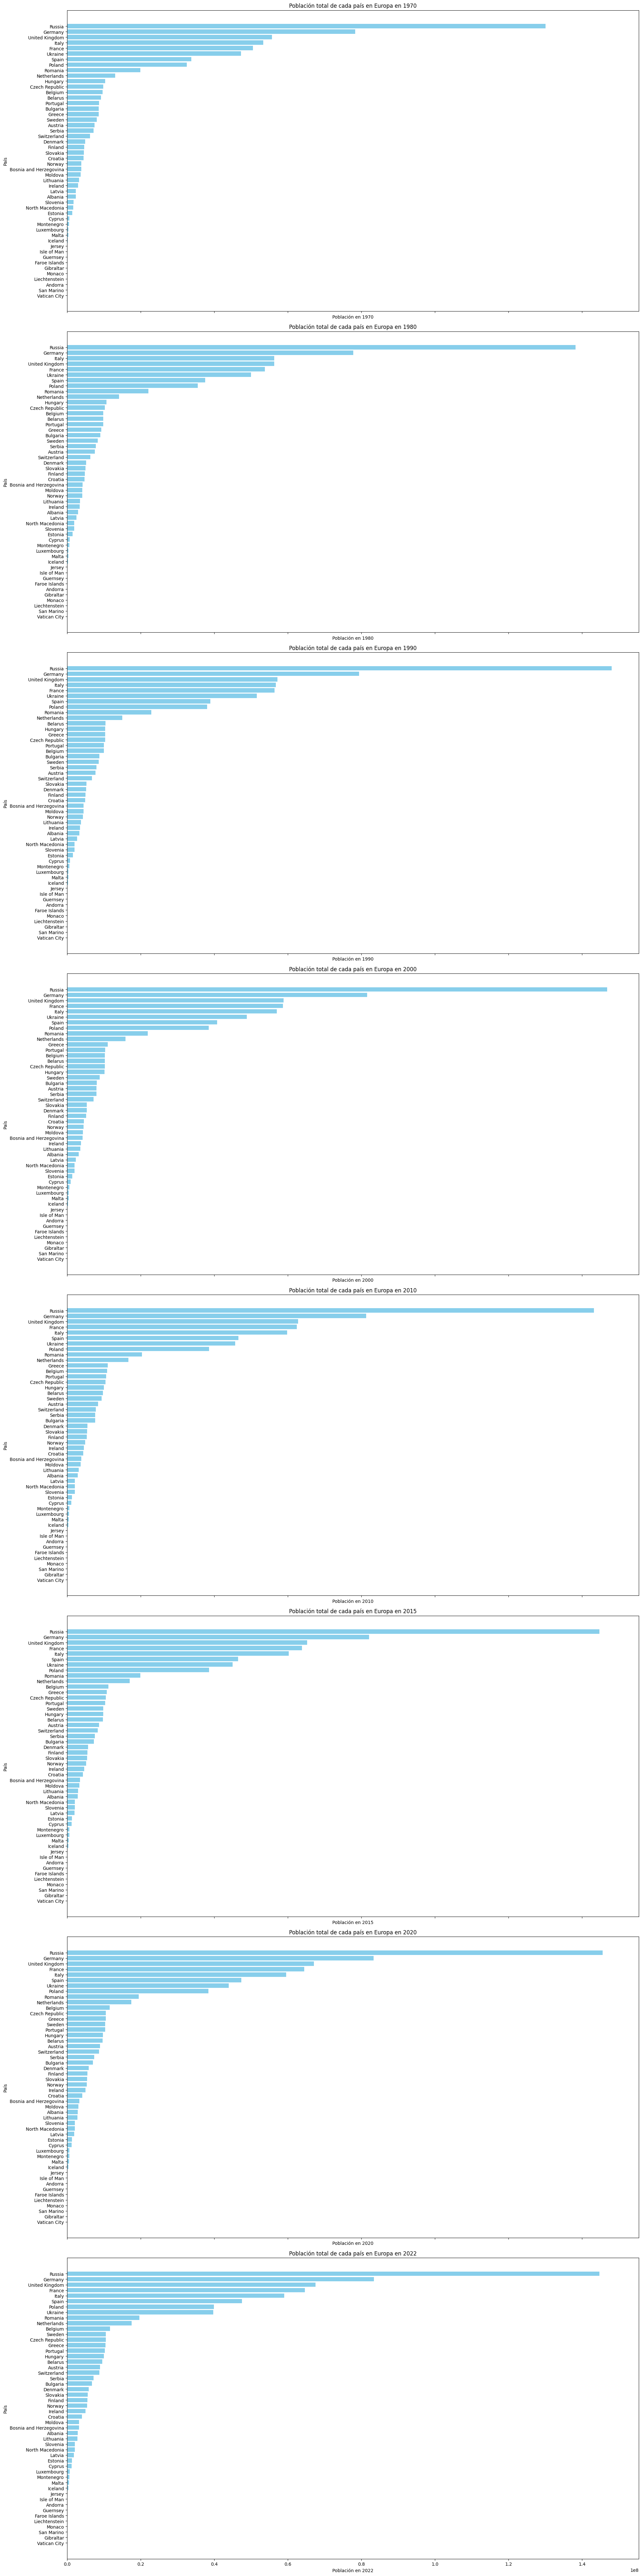

In [31]:
# Crear una figura y ejes para los subgráficos
fig, axs = plt.subplots(8, 1, figsize=(20, 80), sharex=True)

# Lista de años
years = ['1970', '1980', '1990', '2000', '2010', '2015', '2020', '2022']

# Iterar sobre cada año y crear un gráfico para ese año
for i, year in enumerate(years):
    # Seleccionar los datos correspondientes al año
    df_year = df_europa[['Country/Territory', f'{year} Population']]
    df_year_sorted = df_year.sort_values(by=f'{year} Population', ascending=False)

    # Crear el gráfico de barras para el año actual
    axs[i].barh(df_year_sorted['Country/Territory'], df_year_sorted[f'{year} Population'], color='skyblue')
    axs[i].set_xlabel(f'Población en {year}')
    axs[i].set_ylabel('País')
    axs[i].set_title(f'Población total de cada país en Europa en {year}')
    axs[i].invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# **DataFrame🐼 de Asia 🗺**

In [32]:
df_asia = df.loc[df['Continent'] == 'Asia']
df_asia


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Code
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.06,1.03,0.52,AFG
9,140,ARM,Armenia,Yerevan,Asia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377,29743,93.48,1.00,0.03,ARM
13,91,AZE,Azerbaijan,Baku,Asia,10358074,10284951,9863480,9237202,8190337,7427836,6383060,5425317,86600,119.61,1.00,0.13,AZE
15,154,BHR,Bahrain,Manama,Asia,1472233,1477469,1362142,1213645,711442,517418,362595,222555,765,1924.49,1.01,0.02,BHR
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.04,1.01,2.15,BGD
23,165,BTN,Bhutan,Thimphu,Asia,782455,772506,743274,705516,587207,558442,415257,298894,38394,20.38,1.01,0.01,BTN
29,175,BRN,Brunei,Bandar Seri Begawan,Asia,449002,441725,421437,396053,333926,261928,187921,133343,5765,77.88,1.01,0.01,None
33,73,KHM,Cambodia,Phnom Penh,Asia,16767842,16396860,15417523,14363532,12118841,8910808,6198959,6708525,181035,92.62,1.01,0.21,KHM
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.89,1.00,17.88,CHN
73,131,GEO,Georgia,Tbilisi,Asia,3744385,3765912,3771132,3836831,4265172,5391636,5145843,4800426,69700,53.72,1.00,0.05,GEO


In [33]:
!pip install plotly.express

In [34]:
import plotly.express as px
import pandas as pd
df_asia.rename(columns={"Country/Territory": "pais", "World Population Percentage": "Poblacion_mundial"}, inplace=True)
fig = px.line(df_asia, x="pais", y="Poblacion_mundial")
fig.show()

<ipython-input-34-5a541d3e0863>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **DataFrame🐼 de Africa 🗺**

In [ ]:
df_africa = df.loc[df['Continent'] == 'Africa']
df_africa


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.85,1.02,0.56
5,42,AGO,Angola,Luanda,Africa,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700,1246700,28.55,1.03,0.45
21,77,BEN,Benin,Porto-Novo,Africa,13352864,12643123,10932783,9445710,6998023,5133419,3833939,3023443,112622,118.56,1.03,0.17
26,144,BWA,Botswana,Gaborone,Africa,2630296,2546402,2305171,2091664,1726985,1341474,938578,592244,582000,4.52,1.02,0.03
31,58,BFA,Burkina Faso,Ouagadougou,Africa,22673762,21522626,18718019,16116845,11882888,9131361,6932967,5611666,272967,83.06,1.03,0.28
32,78,BDI,Burundi,Bujumbura,Africa,12889576,12220227,10727148,9126605,6307659,5483793,4312834,3497834,27834,463.09,1.03,0.16
34,53,CMR,Cameroon,Yaounde,Africa,27914536,26491087,23012646,19878036,15091594,11430520,8519891,6452787,475442,58.71,1.03,0.35
36,171,CPV,Cape Verde,Praia,Africa,593149,582640,552166,521212,458251,364563,317234,287262,4033,147.07,1.01,0.01
38,117,CAF,Central African Republic,Bangui,Africa,5579144,5343020,4819333,4660067,3759170,2809221,2415276,2067356,622984,8.96,1.02,0.07
39,69,TCD,Chad,N'Djamena,Africa,17723315,16644701,14140274,11894727,8259137,5827069,4408230,3667394,1284000,13.80,1.03,0.22


# **DataFrame🐼 de Norte América 🗺**

In [ ]:
df_north_america = df.loc[df['Continent'] == 'North America']
df_north_america


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
6,224,AIA,Anguilla,The Valley,North America,15857,15585,14525,13172,11047,8316,6560,6283,91,174.25,1.01,0.00
7,201,ATG,Antigua and Barbuda,Saint John’s,North America,93763,92664,89941,85695,75055,63328,64888,64516,442,212.13,1.01,0.00
10,198,ABW,Aruba,Oranjestad,North America,106445,106585,104257,100341,89101,65712,62267,59106,180,591.36,1.00,0.00
14,176,BHS,Bahamas,Nassau,North America,409984,406471,392697,373272,325014,270679,223752,179129,13943,29.40,1.01,0.01
17,186,BRB,Barbados,Bridgetown,North America,281635,280693,278083,274711,264657,258868,253575,241397,430,654.97,1.00,0.00
20,177,BLZ,Belize,Belmopan,North America,405272,394921,359871,322106,240406,182589,145133,120905,22966,17.65,1.01,0.01
22,206,BMU,Bermuda,Hamilton,North America,64184,64031,63144,63447,61371,57470,53565,52019,54,1188.59,1.00,0.00
28,221,VGB,British Virgin Islands,Road Town,North America,31305,30910,29366,27556,20104,15617,11109,9581,151,207.32,1.01,0.00
35,39,CAN,Canada,Ottawa,North America,38454327,37888705,35732126,33963412,30683313,27657204,24511510,21434577,9984670,3.85,1.01,0.48
37,205,CYM,Cayman Islands,George Town,North America,68706,67311,60911,54074,39658,26027,17100,10533,264,260.25,1.01,0.00


# **DataFrame🐼 de Sur América 🗺**

In [ ]:
df_africa = df.loc[df['Continent'] == 'South America']
df_africa


,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
8,33,ARG,Argentina,Buenos Aires,South America,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803,2780400,16.37,1.01,0.57
24,80,BOL,Bolivia,Sucre,South America,12224110,11936162,11090085,10223270,8592656,7096194,5736088,4585693,1098581,11.13,1.01,0.15
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.28,1.00,2.70
40,65,CHL,Chile,Santiago,South America,19603733,19300315,17870124,17004162,15351799,13342868,11469828,9820481,756102,25.93,1.01,0.25
42,28,COL,Colombia,Bogota,South America,51874024,50930662,47119728,44816108,39215135,32601393,26176195,20905254,1141748,45.43,1.01,0.65
56,67,ECU,Ecuador,Quito,South America,18001000,17588595,16195902,14989585,12626507,10449837,8135845,6172215,276841,65.02,1.01,0.23
64,231,FLK,Falkland Islands,Stanley,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.31,1.00,0.00
69,184,GUF,French Guiana,Cayenne,South America,304557,290969,257026,228453,164351,113931,66825,46484,83534,3.65,1.02,0.00
86,164,GUY,Guyana,Georgetown,South America,808726,797202,755031,747932,759051,747116,778176,705261,214969,3.76,1.01,0.01
161,109,PRY,Paraguay,Asunción,South America,6780744,6618695,6177950,5768613,5123819,4059195,3078912,2408787,406752,16.67,1.01,0.09


# **DataFrame🐼 de Oceanía 🗺**

In [ ]:
df_oceania = df.loc[df['Continent'] == 'Oceania']
df_oceania


# **Mapa Mundi 🗺**

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


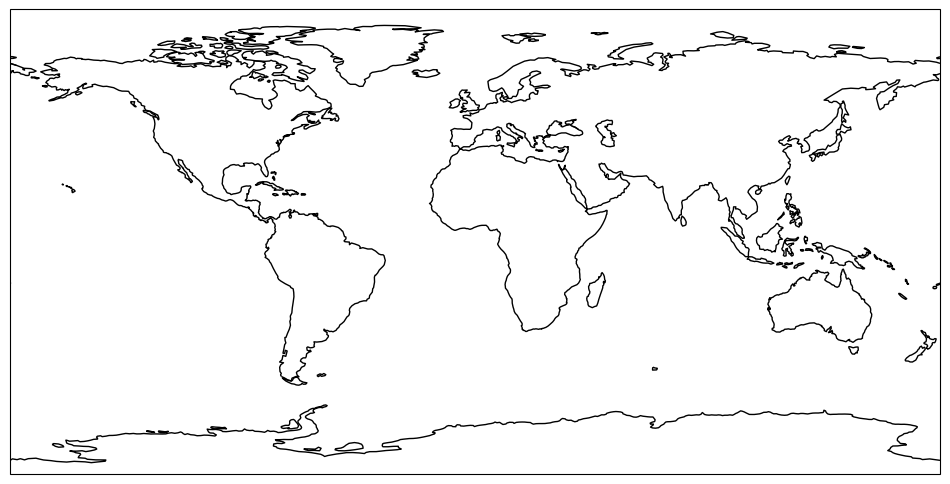

In [6]:

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()


#plt.savefig('coastlines.pdf')
#plt.savefig('coastlines.png')

plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip



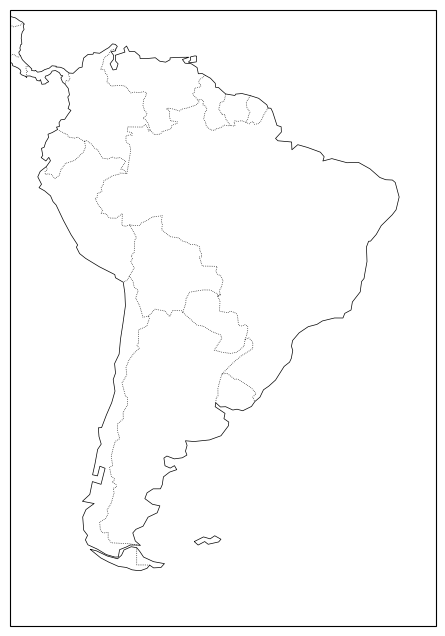

In [ ]:
# Definir el límite geográfico de Sudamérica
south_america_extent = [-85, -30, -60, 15]  # [longitud mínima, longitud máxima, latitud mínima, latitud máxima]

# Crear una figura y ejes
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer el límite geográfico del mapa a Sudamérica
ax.set_extent(south_america_extent)

# Agregar contornos de los países de Sudamérica
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Agregar detalles adicionales, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Mostrar el mapa de Sudamérica
plt.show()

In [ ]:
!pip install --upgrade plotly-express

In [7]:
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import json

# Cargar los datos geográficos de Sudamérica desde el archivo GeoJSON
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/south-america.geojson') as response:
    counties = json.load(response)

# Leer el archivo CSV con datos de población
df_africa = pd.read_csv("world_population.csv", dtype={"Country/Territory": str})

# Crear el mapa coroplético
fig = px.choropleth(df_africa, locations='Country/Territory', color='2022 Population',
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000000),
                    scope="south america",
                    labels={'2022 Population':'Population'}
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [20]:
import pandas as pd
import plotly.express as px
import json

# Cargar los datos geográficos de América del Norte desde el archivo GeoJSON local
with open('north_america_map.json') as f:
    counties = json.load(f)

# Leer el archivo CSV con datos de población
df_north_america = pd.read_csv("world_population.csv", dtype={"Country/Territory": str})

# Crear el mapa coroplético
fig = px.choropleth(df_north_america, locations='Country/Territory', color='2022 Population',
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000000),
                    scope="north america",
                    labels={'2022 Population':'Population'}
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
!pip install plotly==5.13.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
# Importar los módulos necesarios
import pandas as pd
import plotly.express as px
from urllib.request import urlopen
import json

# Cargar los datos geográficos de África desde el archivo GeoJSON
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/africa.geojson') as response:
    counties = json.load(response)

# Leer el archivo CSV con datos de población
df_africa = pd.read_csv("world_population.csv", dtype={"Country/Territory": str})

# Crear el mapa coroplético
fig = px.choropleth(df_africa, locations='Country/Territory', color='2022 Population',
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000000),
                    scope="africa",
                    labels={'2022 Population':'Population'}
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [13]:
import pandas as pd
import plotly.express as px
import json

# Cargar los datos geográficos de América del Norte desde el archivo GeoJSON local
with open('asia_map.json') as f:
    counties = json.load(f)

# Leer el archivo CSV con datos de población
df_asia = pd.read_csv("world_population.csv", dtype={"Country/Territory": str})

# Crear el mapa coroplético
fig = px.choropleth(df_asia, locations='Country/Territory', color='2022 Population',
                    color_continuous_scale="Viridis",
                    range_color=(0, 1000000),
                    scope="asia",
                    labels={'2022 Population':'Population'}
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
# Definir el límite geográfico de Europa
europe_extent = [-20, 50, 35, 70]  # [longitud mínima, longitud máxima, latitud mínima, latitud máxima]

# Crear una figura y ejes
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer el límite geográfico del mapa a Europa
ax.set_extent(europe_extent)

# Agregar contornos de los países de Europa
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Agregar detalles adicionales, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Mostrar el mapa de Europa
plt.show()


NameError: name 'plt' is not defined

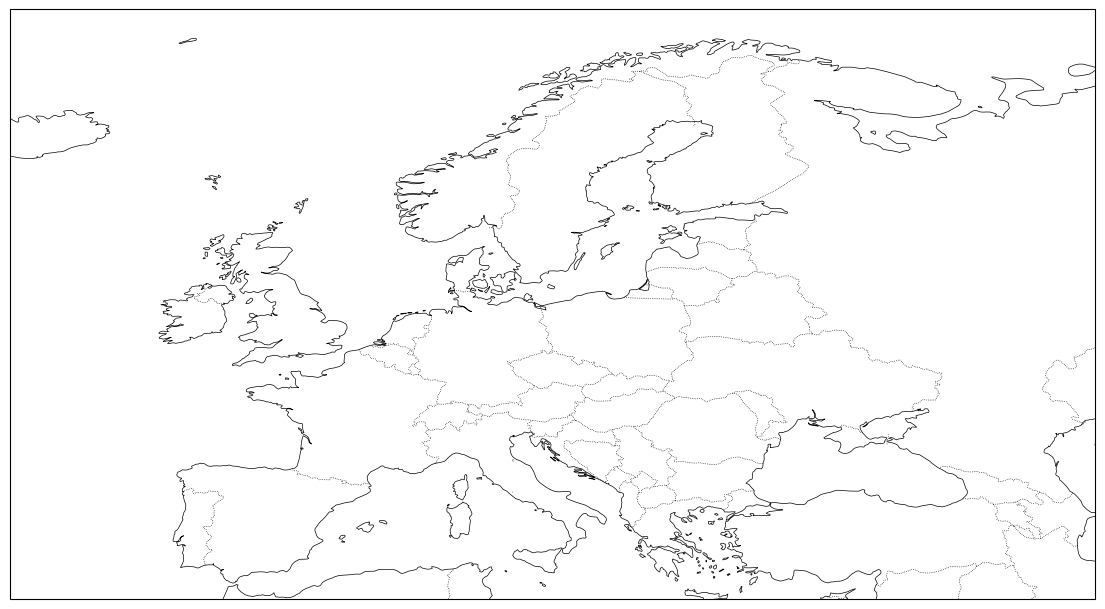

In [ ]:
# Definir el límite geográfico de Europa
europe_extent = [-20, 50, 35, 70]  # [longitud mínima, longitud máxima, latitud mínima, latitud máxima]

# Crear una figura y ejes
plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer el límite geográfico del mapa a Europa
ax.set_extent(europe_extent)

# Agregar contornos de los países de Europa
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Agregar detalles adicionales, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Mostrar el mapa de Europa
plt.show()

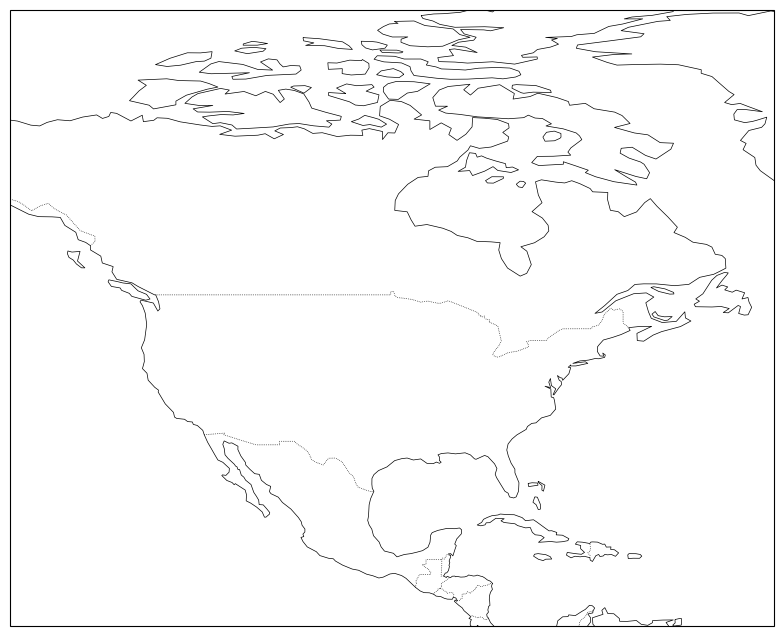

In [ ]:
# Definir el límite geográfico de América del Norte
north_america_extent = [-140, -50, 10, 80]  # [longitud mínima, longitud máxima, latitud mínima, latitud máxima]

# Crear una figura y ejes
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer el límite geográfico del mapa a América del Norte
ax.set_extent(north_america_extent)

# Agregar contornos de los países de América del Norte
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Agregar detalles adicionales, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Mostrar el mapa de América del Norte
plt.show()

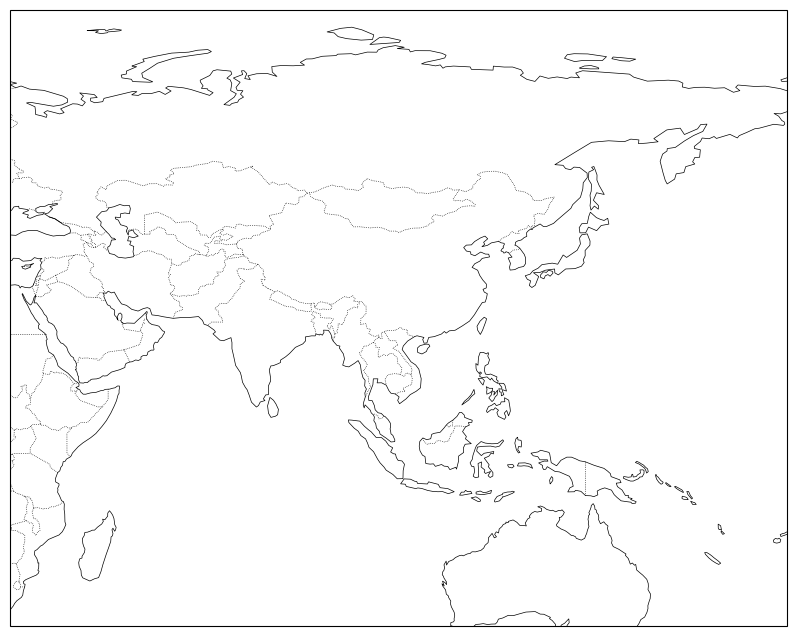

In [ ]:
# Definir el límite geográfico de Asia
asia_extent = [30, 180, -10, 70]  # [longitud mínima, longitud máxima, latitud mínima, latitud máxima]

# Crear una figura y ejes
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Establecer el límite geográfico del mapa a Asia
ax.set_extent(asia_extent)

# Agregar contornos de los países de Asia
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5, edgecolor='black')

# Agregar detalles adicionales, como la costa
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Mostrar el mapa de Asia
plt.show()

# **Testing Data & Graphics 🗺**

In [ ]:
######################  1970  #########################
df_europa_1970 = df_europa[['Country/Territory', '1970 Population']]

# Ordenar por población en 2022 de mayor a menor
df_europa_1970_sorted = df_europa_1970.sort_values(by='1970 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_1970_sorted['Country/Territory'], df_europa_1970_sorted['1970 Population'], color='skyblue')
plt.barh(df_europa_1970_sorted['Country/Territory'], df_europa_1970_sorted['1970 Population'], color='skyblue')
plt.xlabel('Población en 1970')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 1970')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

######################  1980  #########################
df_europa_1980 = df_europa[['Country/Territory', '1980 Population']]

# Ordenar por población en 2022 de mayor a menor
df_europa_1980_sorted = df_europa_1980.sort_values(by='1980 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_1980_sorted['Country/Territory'], df_europa_1980_sorted['1980 Population'], color='skyblue')
plt.barh(df_europa_1980_sorted['Country/Territory'], df_europa_1980_sorted['1980 Population'], color='skyblue')
plt.xlabel('Población en 1980')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 1980')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

######################  1990  #########################
df_europa_1990 = df_europa[['Country/Territory', '1990 Population']]

# Ordenar por población en 2022 de mayor a menor
df_europa_1990_sorted = df_europa_1990.sort_values(by='1990 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_1990_sorted['Country/Territory'], df_europa_1990_sorted['1990 Population'], color='skyblue')
plt.barh(df_europa_1990_sorted['Country/Territory'], df_europa_1990_sorted['1990 Population'], color='skyblue')
plt.xlabel('Población en 1990')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 1990')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

######################  2000  #########################
df_europa_2000 = df_europa[['Country/Territory', '2000 Population']]

# Ordenar por población en 2022 de mayor a menor
df_europa_2000_sorted = df_europa_2000.sort_values(by='2000 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_2000_sorted['Country/Territory'], df_europa_2000_sorted['2000 Population'], color='skyblue')
plt.barh(df_europa_2000_sorted['Country/Territory'], df_europa_2000_sorted['2000 Population'], color='skyblue')
plt.xlabel('Población en 2000')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 1990')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

######################  2010  #########################
df_europa_2010 = df_europa[['Country/Territory', '2010 Population']]

# Ordenar por población en 2010 de mayor a menor
df_europa_2010_sorted = df_europa_2010.sort_values(by='2010 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_2010_sorted['Country/Territory'], df_europa_2010_sorted['2010 Population'], color='skyblue')
plt.barh(df_europa_2010_sorted['Country/Territory'], df_europa_2010_sorted['2010 Population'], color='skyblue')
plt.xlabel('Población en 2010')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 2010')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()

######################  2015  #########################
df_europa_2015 = df_europa[['Country/Territory', '2015 Population']]

# Ordenar por población en 2010 de mayor a menor
df_europa_2015_sorted = df_europa_2015.sort_values(by='2015 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_2015_sorted['Country/Territory'], df_europa_2015_sorted['2015 Population'], color='skyblue')
plt.barh(df_europa_2015_sorted['Country/Territory'], df_europa_2015_sorted['2015 Population'], color='skyblue')
plt.xlabel('Población en 2015')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 2015')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()


# Ordenar por población en 2020 de mayor a menor
df_europa_2020 = df_europa[['Country/Territory', '2020 Population']]
df_europa_2020_sorted = df_europa_2020.sort_values(by='2020 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_2020_sorted['Country/Territory'], df_europa_2020_sorted['2020 Population'], color='skyblue')
plt.barh(df_europa_2020_sorted['Country/Territory'], df_europa_2020_sorted['2020 Population'], color='skyblue')
plt.xlabel('Población en 2020')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 2020')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()


######################  2022  #########################
df_europa_2022 = df_europa[['Country/Territory', '2022 Population']]

# Ordenar por población en 2022 de mayor a menor
df_europa_2022_sorted = df_europa_2022.sort_values(by='2022 Population', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
plt.barh(df_europa_2022_sorted['Country/Territory'], df_europa_2022_sorted['2022 Population'], color='skyblue')
plt.barh(df_europa_2022_sorted['Country/Territory'], df_europa_2022_sorted['2022 Population'], color='skyblue')
plt.xlabel('Población en 2022')
plt.ylabel('País')
plt.title('Población total de cada país Europa en 2022')
plt.gca().invert_yaxis()  # Invertir el eje y para ordenar de mayor a menor
plt.show()